<a href="https://colab.research.google.com/github/shravankumargulvadi/PROJECT-1/blob/master/Assignment_1A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

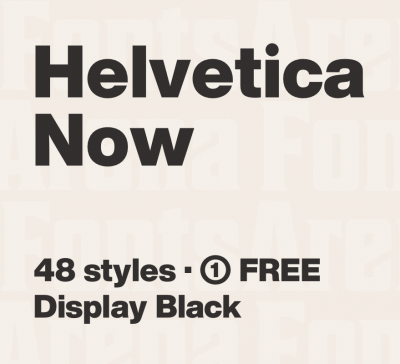

In [4]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
edges = cv2.Canny(image,100,200)

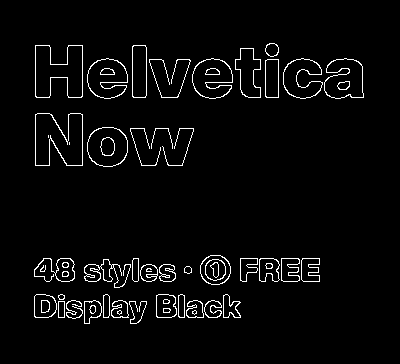

In [6]:
cv2_imshow(edges)

# Horizontal Edge Detector
 ## Key Ideas Involved:
 1. Edge is a demarcation that separates two very different looking regions (interms of colour/light intensity).
 2. Hence 'Gradient' (Which is a measure of rate of change) across the edge will be high.
 3. So if we design our kernel such that it captures the essence of gradient we will end up with a resultant image where edges will be highlighted, since rate of change across them is high & the other regions will be dark since the surrounding pixel will be more or less similar looking.
 4. Particularly for a horizontal edge the gradient in the vertical direction will be high viz dF/dy is high (where F is pixel intensity). But since an image is represented as a matrix which is a descrete system instead of a differential we approximate it to a difference equation ie, (F(x,y+1)-F(x,y))/1. Which when written in matrix form give [-1 1] x [F(x,y) F(x,y+1)]'.
 5. Extending the same logic to a 3x3 Kernel we get [[1 1 1], [0 0 0], [-1 -1 -1]]. Here we can imagine that when the cental row of zeroes is aligned with a horizontal edge the difference between the intensities of top and bottom pixels is calculated. Which as explained before will be high for an edge and low else where. Thus a horizontal edge is detected.


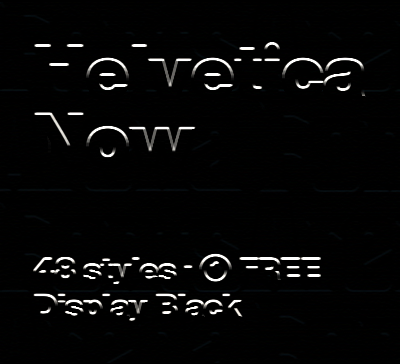

In [7]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[1,1,1],[0,0,0],[
    -1,-1,-1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

# 45 Degree Angle Detector
 ## Key Ideas Involved are similar to the horizontal edge detector case except that we are interested in finding the gradient across a 45 degree line, which can be accomplished by taking a square kernel and giving opposite signs to the elements on either side of its 'Diagonal'. ie, [[1 1 0][1 0 -1][0 -1 -1]] and [[0 1 1][-1 0 1][-1 -1 0]] the diagonal which themselves are 45 degree lines when are aligned with 45degree edge give the gradient estimation across the edge, similar to the previous case.

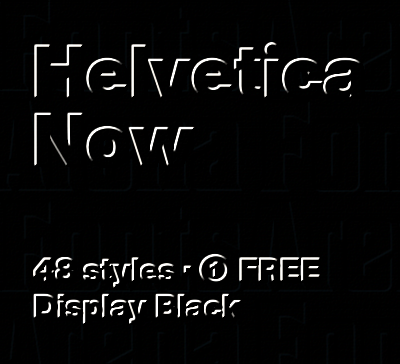

In [8]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[1,1,0],[1,0,-1],[
    0,-1,-1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

# Identity Kernel
## Key Idea: If we imagine convoluting on an image at a particular region the result of this operation will be a single pixel at a location corresponding to the centre of the kernel. If we are suppose to perfectly duplicate the original image we need to transfer the original pixel at the central location and nothing else, thus the required kernel would be [[0 0 0][0 1 0][0 0 0]]

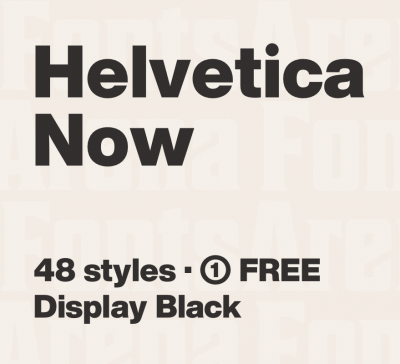

In [9]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[0,0,0],[0,1,0],[
    0,0,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

# Blurring
## Key Idea: Averaging the neighbouring pixel intensities will give a feel of gradual change in intensity in other words 'unsharpen' the image. 

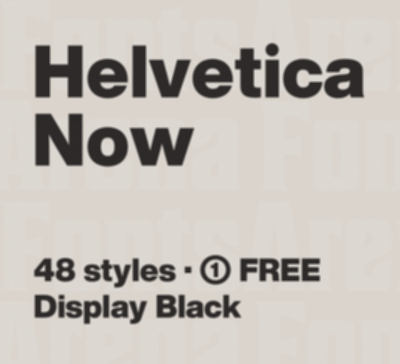

In [10]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[0.1,0.1,0.1],[0.1,0.1,0.1],[
    0.1,0.1,0.1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

# Sharpen Kernel
## Key Ideas:
1. Our intention is to increase the contrast in the image.
2. ie, If a pixel of 'x' intensity is surrounded by other pixels of the same intensity we retain the pixel as it is.
3. But if a pixel is 'Dark' (low intensity) and is surrounded completely/partially by lighter pixels then we intend to increase the 'darkness' of that pixel. (vice versa for lighter pixels)
ex:[[-1 -1 -1][-1 9 -1][-1 -1 -1]] 
> if this is convolved over a region with similar looking pixels 'x' we end up getting 9x-x-x-x-x-x-x-x-x=x.

>> In case the pixel is dark(low value-tend to zero) & is surrounded by lighter pixels (high value-tend to 255) we get,    result= 9 x (low value)- 8 x (high value), thus R will be a very small number thus very dark. (a vice versa case can also be imagined)

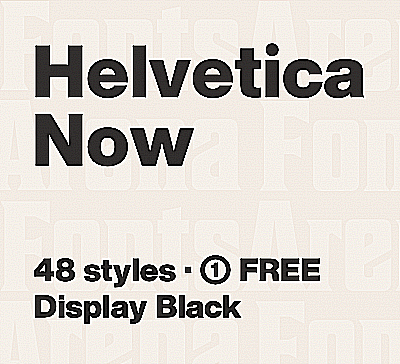

In [11]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,-1,-1],[-1,9,-1],[
    -1,-1,-1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)